In [46]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

API_KEY = os.getenv("FOOTBALL_API_KEY")

if not API_KEY:
    raise ValueError("❌ API KEY no encontrada. Configura la variable de entorno.")


print("✅ API KEY cargada correctamente")

✅ API KEY cargada correctamente


In [47]:
url = "https://v3.football.api-sports.io/leagues"

headers = {
    "x-apisports-key": API_KEY
}

response = requests.get(url, headers=headers)

data = response.json()

print(data)


{'get': 'leagues', 'parameters': [], 'errors': [], 'results': 1218, 'paging': {'current': 1, 'total': 1}, 'response': [{'league': {'id': 4, 'name': 'Euro Championship', 'type': 'Cup', 'logo': 'https://media.api-sports.io/football/leagues/4.png'}, 'country': {'name': 'World', 'code': None, 'flag': None}, 'seasons': [{'year': 2008, 'start': '2008-06-07', 'end': '2008-06-29', 'current': False, 'coverage': {'fixtures': {'events': True, 'lineups': True, 'statistics_fixtures': False, 'statistics_players': False}, 'standings': False, 'players': True, 'top_scorers': True, 'top_assists': True, 'top_cards': True, 'injuries': False, 'predictions': True, 'odds': False}}, {'year': 2012, 'start': '2012-06-08', 'end': '2012-07-01', 'current': False, 'coverage': {'fixtures': {'events': True, 'lineups': True, 'statistics_fixtures': False, 'statistics_players': False}, 'standings': False, 'players': True, 'top_scorers': True, 'top_assists': True, 'top_cards': True, 'injuries': False, 'predictions': True

In [48]:
url_live = "https://v3.football.api-sports.io/fixtures?live=all"

response_live = requests.get(url_live, headers=headers)
data_live = response_live.json()

print("Partidos en vivo:", data_live["results"])

Partidos en vivo: 4


In [49]:
type(data)


dict

In [50]:
data.keys()

dict_keys(['get', 'parameters', 'errors', 'results', 'paging', 'response'])

In [51]:
type(data["response"])

list

In [52]:
len(data["response"])

1218

In [53]:
data["response"][0]



{'league': {'id': 4,
  'name': 'Euro Championship',
  'type': 'Cup',
  'logo': 'https://media.api-sports.io/football/leagues/4.png'},
 'country': {'name': 'World', 'code': None, 'flag': None},
 'seasons': [{'year': 2008,
   'start': '2008-06-07',
   'end': '2008-06-29',
   'current': False,
   'coverage': {'fixtures': {'events': True,
     'lineups': True,
     'statistics_fixtures': False,
     'statistics_players': False},
    'standings': False,
    'players': True,
    'top_scorers': True,
    'top_assists': True,
    'top_cards': True,
    'injuries': False,
    'predictions': True,
    'odds': False}},
  {'year': 2012,
   'start': '2012-06-08',
   'end': '2012-07-01',
   'current': False,
   'coverage': {'fixtures': {'events': True,
     'lineups': True,
     'statistics_fixtures': False,
     'statistics_players': False},
    'standings': False,
    'players': True,
    'top_scorers': True,
    'top_assists': True,
    'top_cards': True,
    'injuries': False,
    'predictions':

In [54]:
df_clean = pd.json_normalize(data['response'])
print("DF creado")
df_clean.head()


DF creado


,seasons,league.id,league.name,league.type,league.logo,country.name,country.code,country.flag
0,"[{'year': 2008, 'start': '2008-06-07', 'end': ...",4,Euro Championship,Cup,https://media.api-sports.io/football/leagues/4...,World,None,None
1,"[{'year': 2009, 'start': '2009-06-14', 'end': ...",21,Confederations Cup,Cup,https://media.api-sports.io/football/leagues/2...,World,None,None
2,"[{'year': 2010, 'start': '2010-08-06', 'end': ...",62,Ligue 2,League,https://media.api-sports.io/football/leagues/6...,France,FR,https://media.api-sports.io/flags/fr.svg
3,"[{'year': 2010, 'start': '2010-08-07', 'end': ...",61,Ligue 1,League,https://media.api-sports.io/football/leagues/6...,France,FR,https://media.api-sports.io/flags/fr.svg
4,"[{'year': 2010, 'start': '2010-07-30', 'end': ...",144,Jupiler Pro League,League,https://media.api-sports.io/football/leagues/1...,Belgium,BE,https://media.api-sports.io/flags/be.svg


In [55]:
df_clean = df_clean[[
    'league.id',
    'league.name',
    'league.type',
    'country.name'
]]

df_clean.head()


,league.id,league.name,league.type,country.name
0,4,Euro Championship,Cup,World
1,21,Confederations Cup,Cup,World
2,62,Ligue 2,League,France
3,61,Ligue 1,League,France
4,144,Jupiler Pro League,League,Belgium


In [56]:
df_clean.columns = ['league_id', 'league_name', 'league_type', 'country']

In [57]:
seasons_df = pd.json_normalize(
    data['response'],
    record_path='seasons',
    meta=[
        ['league', 'id'],
        ['league', 'name'],
        ['country', 'name']
    ]
)

seasons_df.head()

,year,start,end,current,coverage.fixtures.events,coverage.fixtures.lineups,coverage.fixtures.statistics_fixtures,coverage.fixtures.statistics_players,coverage.standings,coverage.players,coverage.top_scorers,coverage.top_assists,coverage.top_cards,coverage.injuries,coverage.predictions,coverage.odds,league.id,league.name,country.name
0,2008,2008-06-07,2008-06-29,False,True,True,False,False,False,True,True,True,True,False,True,False,4,Euro Championship,World
1,2012,2012-06-08,2012-07-01,False,True,True,False,False,False,True,True,True,True,False,True,False,4,Euro Championship,World
2,2016,2016-06-10,2016-07-10,False,True,True,True,True,True,True,True,True,True,False,True,False,4,Euro Championship,World
3,2020,2019-03-21,2021-07-11,False,True,True,True,True,True,True,True,True,True,False,True,False,4,Euro Championship,World
4,2024,2024-06-14,2024-07-14,True,True,True,True,True,True,True,True,True,True,False,True,False,4,Euro Championship,World


In [58]:
df_clean.info()
df_clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   league_id    1218 non-null   int64 
 1   league_name  1218 non-null   object
 2   league_type  1218 non-null   object
 3   country      1218 non-null   object
dtypes: int64(1), object(3)
memory usage: 38.2+ KB


league_id      0
league_name    0
league_type    0
country        0
dtype: int64

In [59]:
seasons_df.info()
seasons_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026 entries, 0 to 8025
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   year                                   8026 non-null   int64 
 1   start                                  8026 non-null   object
 2   end                                    8026 non-null   object
 3   current                                8026 non-null   bool  
 4   coverage.fixtures.events               8026 non-null   bool  
 5   coverage.fixtures.lineups              8026 non-null   bool  
 6   coverage.fixtures.statistics_fixtures  8026 non-null   bool  
 7   coverage.fixtures.statistics_players   8026 non-null   bool  
 8   coverage.standings                     8026 non-null   bool  
 9   coverage.players                       8026 non-null   bool  
 10  coverage.top_scorers                   8026 non-null   bool  
 11  coverage.top_assi

year                                     0
start                                    0
end                                      0
current                                  0
coverage.fixtures.events                 0
coverage.fixtures.lineups                0
coverage.fixtures.statistics_fixtures    0
coverage.fixtures.statistics_players     0
coverage.standings                       0
coverage.players                         0
coverage.top_scorers                     0
coverage.top_assists                     0
coverage.top_cards                       0
coverage.injuries                        0
coverage.predictions                     0
coverage.odds                            0
league.id                                0
league.name                              0
country.name                             0
dtype: int64

In [60]:
df_clean.to_csv('leagues.csv', index=False)
seasons_df.to_csv('seasons.csv', index=False)


ver estructura general

In [61]:
print("Resultados:", data["results"])
print("Errores:", data["errors"])

Resultados: 1218
Errores: []


In [62]:
# ================= PARTIDOS EN VIVO =================

url_live = "https://v3.football.api-sports.io/fixtures?live=all"

response_live = requests.get(url_live, headers=headers)

data_live = response_live.json()

print("Partidos en vivo:", data_live["results"])


Partidos en vivo: 4


ver primer partido si hay

In [63]:
if data_live["results"] > 0:

    partido = data_live["response"][0]

    home = partido["teams"]["home"]["name"]
    away = partido["teams"]["away"]["name"]

    goles_home = partido["goals"]["home"]
    goles_away = partido["goals"]["away"]

    estado = partido["fixture"]["status"]["long"]

    print(f"{home} {goles_home} - {goles_away} {away}")
    print("Estado:", estado)

else:
    print("No hay partidos en vivo ahora mismo.")


Jalapa 0 - 0 UNAN Managua
Estado: First Half


In [64]:
partidos = []

for match in data_live["response"]:

    goles_local = match["goals"]["home"]
    goles_visitante = match["goals"]["away"]

    # Si vienen como None → poner 0
    if goles_local is None:
        goles_local = 0

    if goles_visitante is None:
        goles_visitante = 0


    partidos.append({

        "liga": match["league"]["name"],
        "pais": match["league"]["country"],

        "local": match["teams"]["home"]["name"],
        "visitante": match["teams"]["away"]["name"],

        "goles_local": goles_local,
        "goles_visitante": goles_visitante,

        "minuto": match["fixture"]["status"]["elapsed"],

        "total_goles": goles_local + goles_visitante,

        "estado": match["fixture"]["status"]["long"]
    })

# FUERA del for
df_live = pd.DataFrame(partidos)
df_live.head()


,liga,pais,local,visitante,goles_local,goles_visitante,minuto,total_goles,estado
0,Primera Division,Nicaragua,Jalapa,UNAN Managua,0,0,40,0,First Half
1,Liga Profesional Argentina,Argentina,Gimnasia M.,Instituto Cordoba,1,0,90,1,Second Half
2,Primera A,Colombia,Jaguares,Deportivo Pereira,1,0,81,1,Second Half
3,Friendlies Clubs,World,Spittal,Pinzgau Saalfelden,1,2,45,3,Halftime


 Export Excel

In [65]:
df_live.to_excel("partidos_en_vivo.xlsx", index=False)
print("file done")

file done


In [66]:
df_live["total_goles"] = df_live["goles_local"] + df_live["goles_visitante"]


In [67]:
df_live.columns


Index(['liga', 'pais', 'local', 'visitante', 'goles_local', 'goles_visitante',
       'minuto', 'total_goles', 'estado'],
      dtype='object')

In [68]:
df_goles = df_live[df_live["total_goles"] >= 3]
print(df_goles)


               liga   pais    local           visitante  goles_local  \
3  Friendlies Clubs  World  Spittal  Pinzgau Saalfelden            1   

   goles_visitante  minuto  total_goles    estado  
3                2      45            3  Halftime  


In [69]:
df_live.groupby("liga")["total_goles"].mean().sort_values(ascending=False)



liga
Friendlies Clubs              3.0
Liga Profesional Argentina    1.0
Primera A                     1.0
Primera Division              0.0
Name: total_goles, dtype: float64

Average goals per league

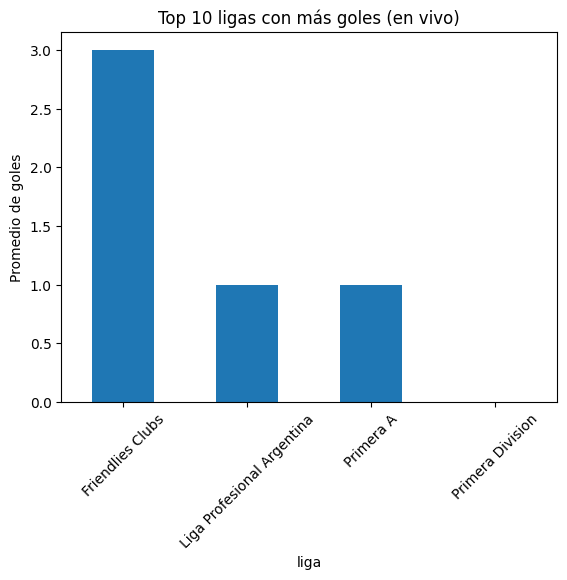

In [70]:
avg_goals = (
    df_live
    .groupby("liga")["total_goles"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
avg_goals.head(10).plot(kind="bar")
plt.title("Top 10 ligas con más goles (en vivo)")
plt.ylabel("Promedio de goles")
plt.xticks(rotation=45)
plt.show()


Goal distribution

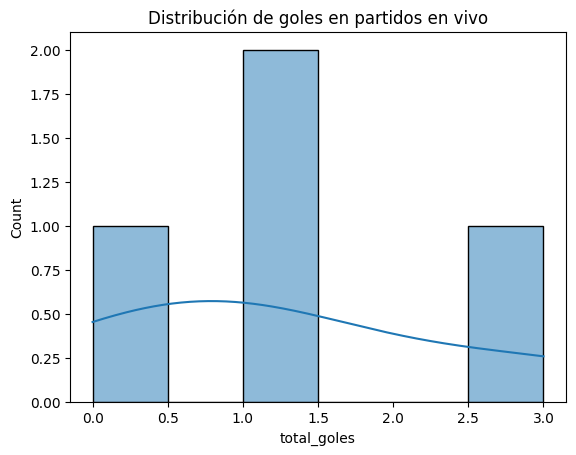

In [71]:
plt.figure()
sns.histplot(df_live["total_goles"], bins=6, kde=True)
plt.title("Distribución de goles en partidos en vivo")
plt.show()


% of matches with 3+ goals

In [72]:
pct = (df_live["total_goles"] >= 3).mean() * 100

print(f"{pct:.2f}% de partidos tienen 3+ goles")

25.00% de partidos tienen 3+ goles


In [73]:
def predict_over25(df):

    df["over25"] = df["total_goles"] >= 3

    prob = df["over25"].mean() * 100

    print(f"\nProbabilidad actual de +2.5 goles: {prob:.2f}%")

    candidates = df[
        (df["minuto"] >= 60) &
        (df["total_goles"] >= 2)
    ]

    print("\nPartidos con alta probabilidad:\n")
    print(candidates[[
        "liga","local","visitante","minuto","total_goles"
    ]])


In [74]:
predict_over25(df_live)


Probabilidad actual de +2.5 goles: 25.00%

Partidos con alta probabilidad:

Empty DataFrame
Columns: [liga, local, visitante, minuto, total_goles]
Index: []


In [75]:
file = "historico_partidos.csv"

cols = [
    "liga",
    "local",
    "visitante",
    "goles_local",
    "goles_visitante",
    "minuto",
    "total_goles"
]

df_save = df_live[cols].drop_duplicates()

if not os.path.exists(file):
    df_save.to_csv(file, index=False)
else:
    df_save.to_csv(file, mode="a", index=False, header=False)



In [76]:
cols = ["liga", "local", "visitante", "minuto", "total_goles"]

df_save = df_live[cols].drop_duplicates()

file = "historico_partidos.csv"

if not os.path.exists(file):
    df_save.to_csv(file, index=False)
else:
    df_save.to_csv(file, mode="a", index=False, header=False)


leer y renombrar columnas

In [77]:
df_hist = pd.read_csv(file)


df_hist.head()


,liga,local,visitante,goles_local,goles_visitante,minuto,total_goles
0,A-League,Auckland,Sydney,1,0,38.0,1.0
1,J1 League,JEF United Chiba,Urawa,0,2,34.0,2.0
2,J1 League,FC Tokyo,Kashima,0,0,3.0,0.0
3,Liga MX,Club Tijuana,Puebla,0,0,72.0,0.0
4,Liga MX,Mazatlán,Guadalajara Chivas,1,2,66.0,3.0


In [78]:
print("Columnas cargadas:")
print(df_hist.columns)


Columnas cargadas:
Index(['liga', 'local', 'visitante', 'goles_local', 'goles_visitante',
       'minuto', 'total_goles'],
      dtype='object')


In [79]:
# Columnas que deben ser numéricas
cols_numeric = [
    "goles_local",
    "goles_visitante",
    "minuto",
    "total_goles"
]
for col in cols_numeric:
    df_hist[col] = pd.to_numeric(df_hist[col], errors="coerce")

# Eliminar filas inválidas
df_hist = df_hist.dropna(subset=cols_numeric)

# Evitar división por cero
df_hist = df_hist[df_hist["minuto"] > 0]

# Convertir a int
df_hist["goles_local"] = df_hist["goles_local"].astype(int)
df_hist["goles_visitante"] = df_hist["goles_visitante"].astype(int)
df_hist["minuto"] = df_hist["minuto"].astype(int)
df_hist["total_goles"] = df_hist["total_goles"].astype(int)



In [80]:
df_hist["goles_local"] = pd.to_numeric(df_hist["goles_local"], errors="coerce")
df_hist["goles_visitante"] = pd.to_numeric(df_hist["goles_visitante"], errors="coerce")

df_hist = df_hist.dropna(subset=["goles_local","goles_visitante"])


In [81]:
df_live["minuto_ratio"] = df_live["minuto"] / 90
df_live["goles_ratio"] = df_live["total_goles"] / df_live["minuto"]


In [82]:
df_hist = df_hist[df_hist["minuto"] > 0]

df_hist["minuto_ratio"] = df_hist["minuto"] / 90
df_hist["goles_ratio"] = df_hist["total_goles"] / df_hist["minuto"]

df_hist["over25"] = df_hist["total_goles"] >= 3



In [83]:
print(df_hist.columns)

Index(['liga', 'local', 'visitante', 'goles_local', 'goles_visitante',
       'minuto', 'total_goles', 'minuto_ratio', 'goles_ratio', 'over25'],
      dtype='object')


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_hist[["minuto","total_goles","minuto_ratio","goles_ratio"]]
y = df_hist["over25"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)



In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, pred))

print("\nClassification Report:\n")
print(classification_report(y_test, pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, pred))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

       False       1.00      1.00      1.00         4
        True       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Confusion Matrix:

[[4 0]
 [0 1]]


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV Score: 1.0


In [87]:
df_hist.head()
df_hist.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 41
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   liga             23 non-null     object 
 1   local            23 non-null     object 
 2   visitante        23 non-null     object 
 3   goles_local      23 non-null     int32  
 4   goles_visitante  23 non-null     int32  
 5   minuto           23 non-null     int32  
 6   total_goles      23 non-null     int32  
 7   minuto_ratio     23 non-null     float64
 8   goles_ratio      23 non-null     float64
 9   over25           23 non-null     bool   
dtypes: bool(1), float64(2), int32(4), object(3)
memory usage: 1.5+ KB


In [88]:
import joblib

joblib.dump(model, "model_over25.pkl")

['model_over25.pkl']

In [89]:
def predict_ml(df, model):

    df = df.copy()
    cols = ["minuto","total_goles","minuto_ratio","goles_ratio"]

    for col in cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    df = df.dropna(subset=cols)

    if df.empty:
        print("⚠️ No hay datos válidos para predecir")
        return df

    X = df[cols]

    df["prob_over25"] = model.predict_proba(X)[:,1]

    return df.sort_values("prob_over25", ascending=False)
